# Libraries

In [54]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from pathlib import Path
import sys

root = str(Path().resolve().parent)
if root not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

%matplotlib ipympl
# %matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


In [55]:
from importlib import reload
from rfdsppy import calc, ofdm, rf_tx_analog, rf_tx_fw

reload(calc)
reload(ofdm)
reload(rf_tx_analog)
reload(rf_tx_fw)

<module 'rfdsppy.rf_tx_fw' from '/home/ryanwtsai/repos/rfdsp_sim/python/rfdsppy/rf_tx_fw.py'>

# Flicker noise simulation

In [82]:
N0 = 1.38e-23*300

fs = 122.88
fc = 1
f = np.linspace(0, fs/2, 2**15+1)
print(f.min())
print(f.max())
print(f.size)
print(1/(f[1]-f[0]))

0.0
61.44
32769
533.3333333333334


In [83]:
S = N0*(1+fc/f[1:])
# plt.semilogx(f[1:], 10*np.log10(S))

In [84]:
rng = np.random.default_rng()
phi = rng.uniform(low=-np.pi, high=np.pi, size=S.size)
print(phi.shape)
print(phi.max())
print(phi.min())

(32768,)
3.141462185304582
-3.141550910560706


In [85]:
N = np.concatenate(([0], np.sqrt(S[:-1]/2), np.sqrt(S[::-1]/2)))
phi2 = np.concatenate(([0], np.exp(1j*phi[:-1]), np.exp(-1j*phi[::-1])))
N = N*phi2
print(N.shape)
# plt.plot(10*np.log10(np.abs(N[1:])))

(65536,)


In [86]:
n = scipy.fft.ifft(N)
print(sum(n.real**2)/sum(n.imag**2))
n = n.real*100

76961.30111304474


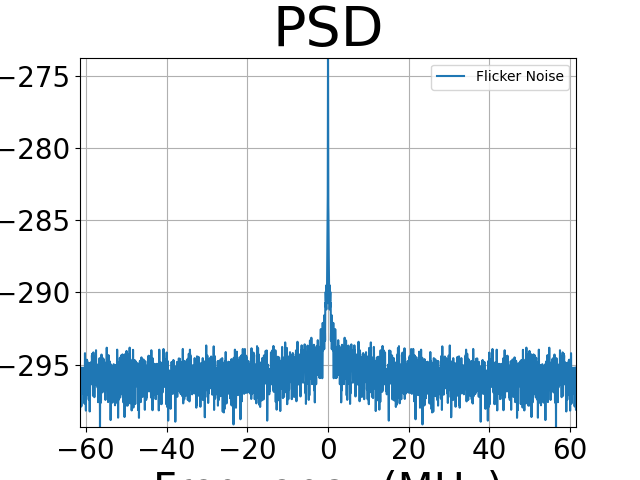

In [87]:
rbw = 1/2**6
p, f = calc.psd(n, fs, rbw)

fig = plt.figure()
# plt.semilogx(f, 10*np.log10(p), label="Flicker Noise")
plt.plot(f, 10*np.log10(p), label="Flicker Noise")
plt.title("PSD", {'fontsize':40})
plt.xlabel("Frequency (MHz)", {'fontsize':30})
plt.ylabel("PSD (dBm/Bin)", {'fontsize':30})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.autoscale(enable=True, axis='both', tight=True)
plt.legend(loc="best")
plt.grid()